# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.options import Options

opt = Options()
opt.add_argument("--headless")
browser = Browser('chrome', options=opt)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [2]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [3]:
# Create a Beautiful Soup Object
s = soup(browser.html, 'html.parser')

In [4]:
# Extract all rows of data
rows = s.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create an empty list
# Loop through the scraped data to create a list of rows
temps = [
    {
        "id": int(tds[0].text),
        "terrestrial_date": pd.to_datetime(tds[1].text, format="%Y-%m-%d"),
        "sol": int(tds[2].text),
        "ls": int(tds[3].text),
        "month": int(tds[4].text),
        "min_temp": float(tds[5].text),
        "pressure": float(tds[6].text)
    }
    for tds
    in [
        row.find_all("td")
        for row
        in rows
    ]
]

In [6]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(temps)

In [7]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
# I bypassed this step by converting them to the expected types before creating the dataframe
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
# Change data types for data analysis
# I bypassed this step by converting them to the expected types before creating the dataframe
# However, this step would look something like:
# for col in df.columns:
#     if col == "terrestrial_date":
#         df[col] = df[col].astype("datetime64")
#     if col in ["min_temp", "pressure"]:
#         df[col] = df[col].astype("float")
#     else:
#         df[col] = df[col].astype("int")

In [10]:
# Confirm type changes were successful by examining data types again
# I bypassed this step by converting them to the expected types before creating the dataframe

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
df["month"].max()

12

In [12]:
# original cell
# 1. How many months are there on Mars?
# Not sure how this answers the question - this would answer the question "How many measurements were taken in each month?"
df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
len(df["sol"].unique())

1867

In [14]:
# 3. What is the average low temperature by month?
df.groupby("month").mean(numeric_only=True)["min_temp"]

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

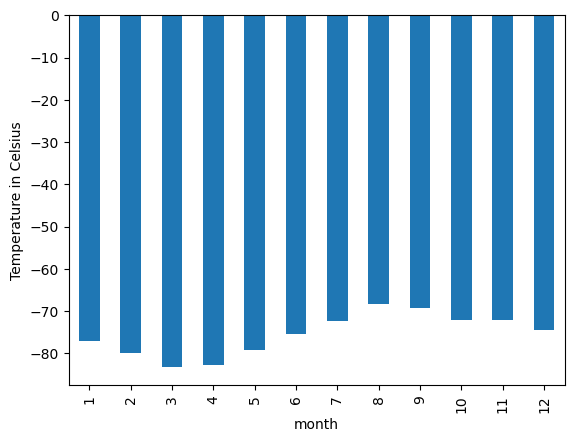

In [15]:
# Plot the average temperature by month
ax = df.groupby("month").mean(numeric_only=True).reset_index().plot.bar("month", "min_temp", legend=False)
ax.set_ylabel("Temperature in Celsius")
plt.show()

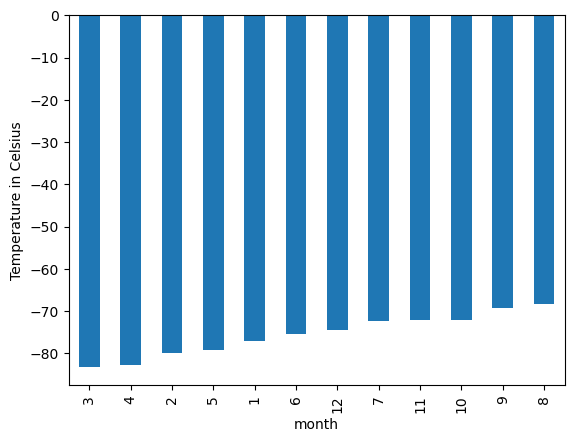

In [16]:
# Identify the coldest and hottest months in Curiosity's location
ax = df.groupby("month").mean(numeric_only=True).reset_index().sort_values(by="min_temp").plot.bar("month", "min_temp", legend=False)
ax.set_ylabel("Temperature in Celsius")
plt.show()

In [17]:
# 4. Average pressure by Martian month
df.groupby("month").mean(numeric_only=True)["pressure"]

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

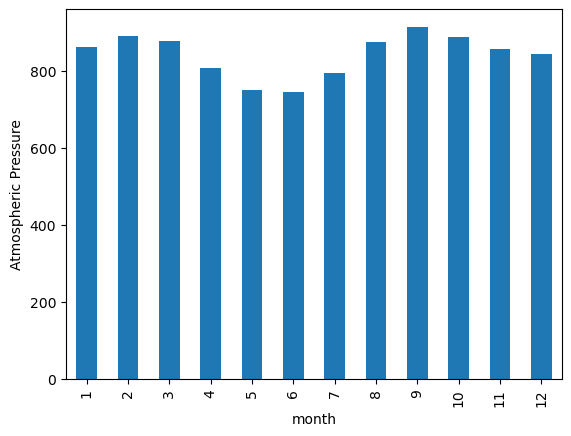

In [18]:
# Plot the average pressure by month
ax = df.groupby("month").mean(numeric_only=True).reset_index().plot.bar("month", "pressure", legend=False)
ax.set_ylabel("Atmospheric Pressure")
plt.show()

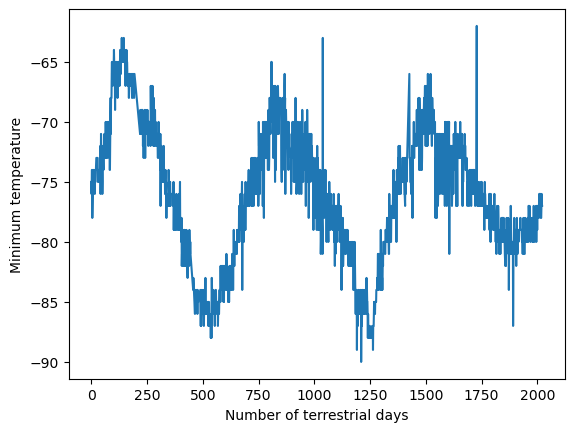

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df["terrestrial_days"] = (df["terrestrial_date"] - df["terrestrial_date"].min()).dt.days
ax = df.plot.line("terrestrial_days", "min_temp", legend=False)
ax.set_xlabel("Number of terrestrial days")
ax.set_ylabel("Minimum temperature")
plt.show()

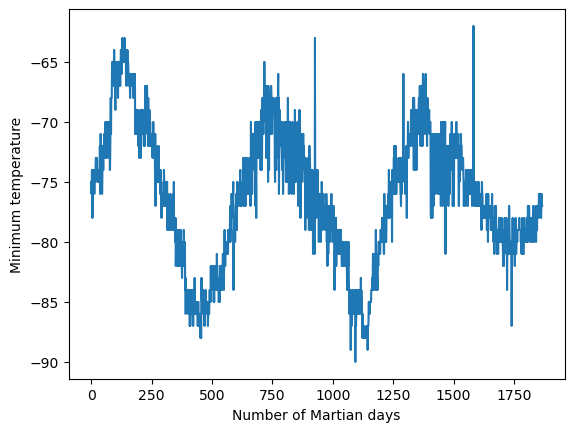

In [20]:
# Leaving this original one here for the sake of argument - it plots them against measurement number, which matches neither Earth day nor Martian day
# 5. How many terrestrial (earth) days are there in a Martian year?
ax = df.reset_index(names="row").plot.line("row", "min_temp", legend=False)
ax.set_xlabel("Number of Martian days")
ax.set_ylabel("Minimum temperature")
plt.show()

In [21]:
last = 9
total_breakdowns = 0
total_missing = 0
m = set()
for row in df.sort_values(by="sol").iterrows():
    if row[1]["sol"] != last + 1:
        total_breakdowns += 1
        m = m | set(range(last + 1, row[1]["sol"]))
        missing_days = row[1]["sol"] - (last + 1)
        total_missing += missing_days
        print(f"Missing {last + 1} to {row[1]['sol'] - 1}, total days {missing_days}")
    last = row[1]["sol"]
print(f"Poor Mars rover, suffering {total_breakdowns} breakdowns, missing {total_missing} (Martian) days of measurements")

Missing 18 to 20, total days 3
Missing 32 to 32, total days 1
Missing 192 to 195, total days 4
Missing 200 to 222, total days 23
Missing 262 to 267, total days 6
Missing 358 to 365, total days 8
Missing 444 to 454, total days 11
Missing 457 to 462, total days 6
Missing 478 to 485, total days 8
Missing 873 to 880, total days 8
Missing 938 to 939, total days 2
Missing 955 to 957, total days 3
Missing 999 to 999, total days 1
Missing 1027 to 1027, total days 1
Missing 1289 to 1290, total days 2
Missing 1389 to 1397, total days 9
Missing 1610 to 1612, total days 3
Missing 1691 to 1691, total days 1
Missing 1786 to 1786, total days 1
Poor Mars rover, suffering 19 breakdowns, missing 101 (Martian) days of measurements


The following answers to the aforementioned questions were already here when I started, but they are all correct according to the data, so if I were to rewrite them, they'd just say the same things in my words.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

-- The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

I lied. This one is less accurate.

The original graph assumed there was one measurement taken per day. This was wrong. There's 1867 measurements over 1968 Martian days' worth of data, but that's 2021 Earth days. 154 Earth days didn't have measurements.

It also took a different date as its later peak date to use with its calculation than matches the actual peak: It takes 1425, when 1425 is that little trough after the peak. The peak would be closer to 1325 or 1350.

These two errors just so happened to combine into giving a correct answer.

I'd have taken 840-150, since the trough at the start of year 3 makes it harder to gauge a good date to give. 840-150 = 690, which is closer to the Mars year (though, given that this is an estimate based on a very inconsistent variable, that's just luck, not indicative of a superior methodology)

*Cunningham's Law at work, everybody!*

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv("output/temp_data.csv", index=False)

In [23]:
browser.quit()